In [117]:
import pandas as pd
import seaborn as sns

df_bb = pd.read_csv('/content/imdb_barbie_Uncleaned.csv', header=None)
df_op = pd.read_csv('/content/imdb_oppenhimmer_Uncleaned.csv', header=None)
df_bb.drop_duplicates(inplace=True)
df_op.drop_duplicates(inplace=True)

# Regular Expression

In [118]:
import re

score_Reg = '(\d{1,2})\/\d{1,2}\s.*\s'
title_Reg = '\d{1,2}\/\d{1,2}\s(.*)'
people_found_helpful_Reg = '([\d,]*) out of ([\d,]*) found this helpful'
username_Reg = '\d{1,2}\/\d{1,2}\s.*\s([A-Za-z0-9_-]+)\d{2}\s[January|February|March|April|June|July|August|September|October|November|December]'
date_Reg = '(\d{1,2}\s\w+\s\d{4})'
review_Reg = '\d{1,2}\s\w+\s\d{4}\s([\s\S]*)\s[\d,]* out of [\d,]* found this helpful'

In [133]:
def get_cleaned_df(dirty_df):
	cleaned_df = pd.DataFrame(columns=['score', 'title', 'username', 'date', 'people_found_helpful', 'people_not_found_helpful', 'review'])

	for index in range(len(dirty_df)):
		row = dirty_df.iloc[index][0]

		score = re.findall(score_Reg, row)
		title = re.findall(title_Reg, row)
		username = re.findall(username_Reg, row)
		date = re.findall(date_Reg, row)
		people_found_helpful = re.findall(people_found_helpful_Reg, row)
		review = re.findall(review_Reg, row)

		if not score:
			continue
		else:
			score = int(score[0])
		if not title:
			title = ['NULL']
		if not username:
			username = ['NULL']
		if not date:
			date = ['NULL']
		if not people_found_helpful:
			people_found_helpful = 'NULL'
			people_not_found_helpful = 'NULL'
		else:
			people_not_found_helpful = int(people_found_helpful[0][1].replace(',', ''))
			people_found_helpful = int(people_found_helpful[0][0].replace(',', ''))
		if not review:
			review = ['NULL']

		cleaned_df.loc[index] = [score, title[0], username[0], date[0], people_found_helpful, people_not_found_helpful, review[0]]
	return cleaned_df

In [134]:
clean_df_bb = get_cleaned_df(df_bb)
clean_df_bb.drop_duplicates(subset=['username'], inplace=True)

In [135]:
clean_df_bb
clean_df_bb.dtypes

score                        int64
title                       object
username                    object
date                        object
people_found_helpful         int64
people_not_found_helpful     int64
review                      object
dtype: object

In [136]:
clean_df_op = get_cleaned_df(df_op)
clean_df_op.drop_duplicates(subset=['username'], inplace=True)

In [137]:
clean_df_op
clean_df_op.dtypes

score                        int64
title                       object
username                    object
date                        object
people_found_helpful         int64
people_not_found_helpful     int64
review                      object
dtype: object

<ipython-input-140-e48faddcf0a0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df_op['date'] = pd.to_datetime(clean_df_op['date'], format='%d %B %Y')
<ipython-input-140-e48faddcf0a0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df_op['date_difference'] = (release_date - clean_df_op['date']).dt.days
<ipython-input-140-e48faddcf0a0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

<Axes: xlabel='movie_id', ylabel='date_difference'>

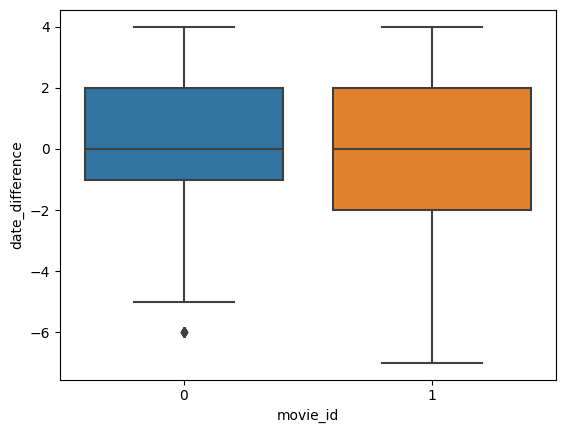

In [140]:
import pandas as pd
import matplotlib.pyplot as plt

clean_df_op = clean_df_op[~clean_df_op['date'].str.contains('IMAX')]

release_date = pd.to_datetime('2023-07-23')

clean_df_op['date'] = pd.to_datetime(clean_df_op['date'], format='%d %B %Y')
clean_df_op['date_difference'] = (release_date - clean_df_op['date']).dt.days

clean_df_bb['date'] = pd.to_datetime(clean_df_bb['date'], format='%d %B %Y')
clean_df_bb['date_difference'] = (release_date - clean_df_bb['date']).dt.days

clean_df_bb['movie_id'] = 0
clean_df_op['movie_id'] = 1
df = pd.concat([clean_df_op, clean_df_bb])

sns.boxplot(data=df, x='movie_id', y='date_difference')

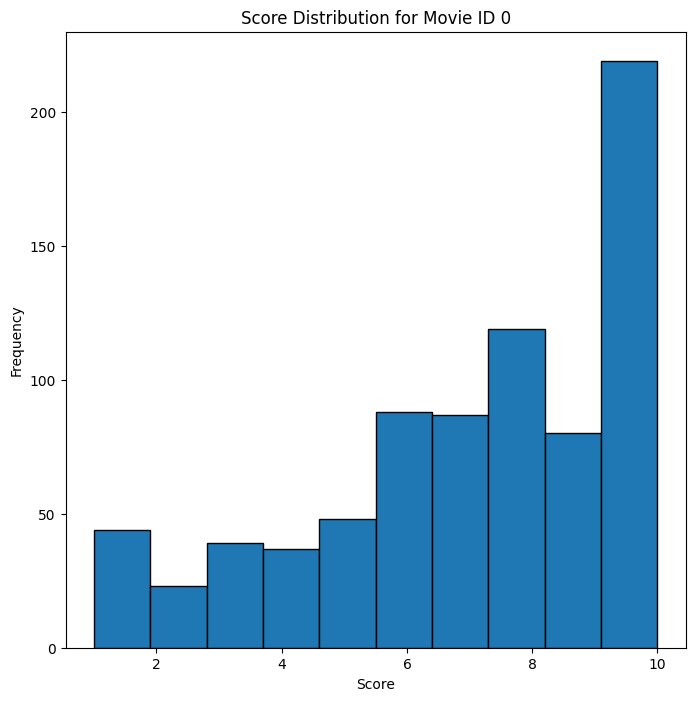

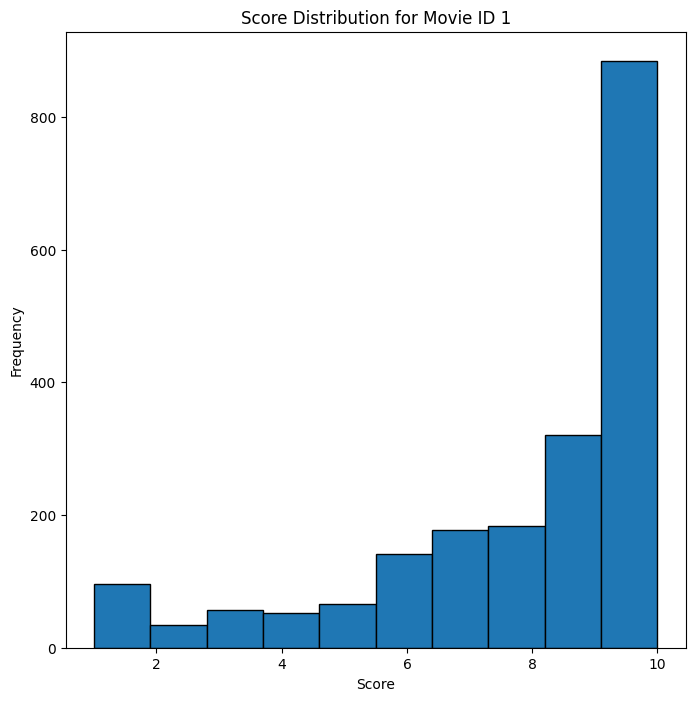

In [141]:
group_by = df.groupby('movie_id')
for movie_id, group_data in group_by:
    plt.figure(figsize=(8, 8))
    plt.hist(group_data['score'], edgecolor='black')
    plt.title(f'Score Distribution for Movie ID {movie_id}')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.show()